Generating and analyzing GARCH process...


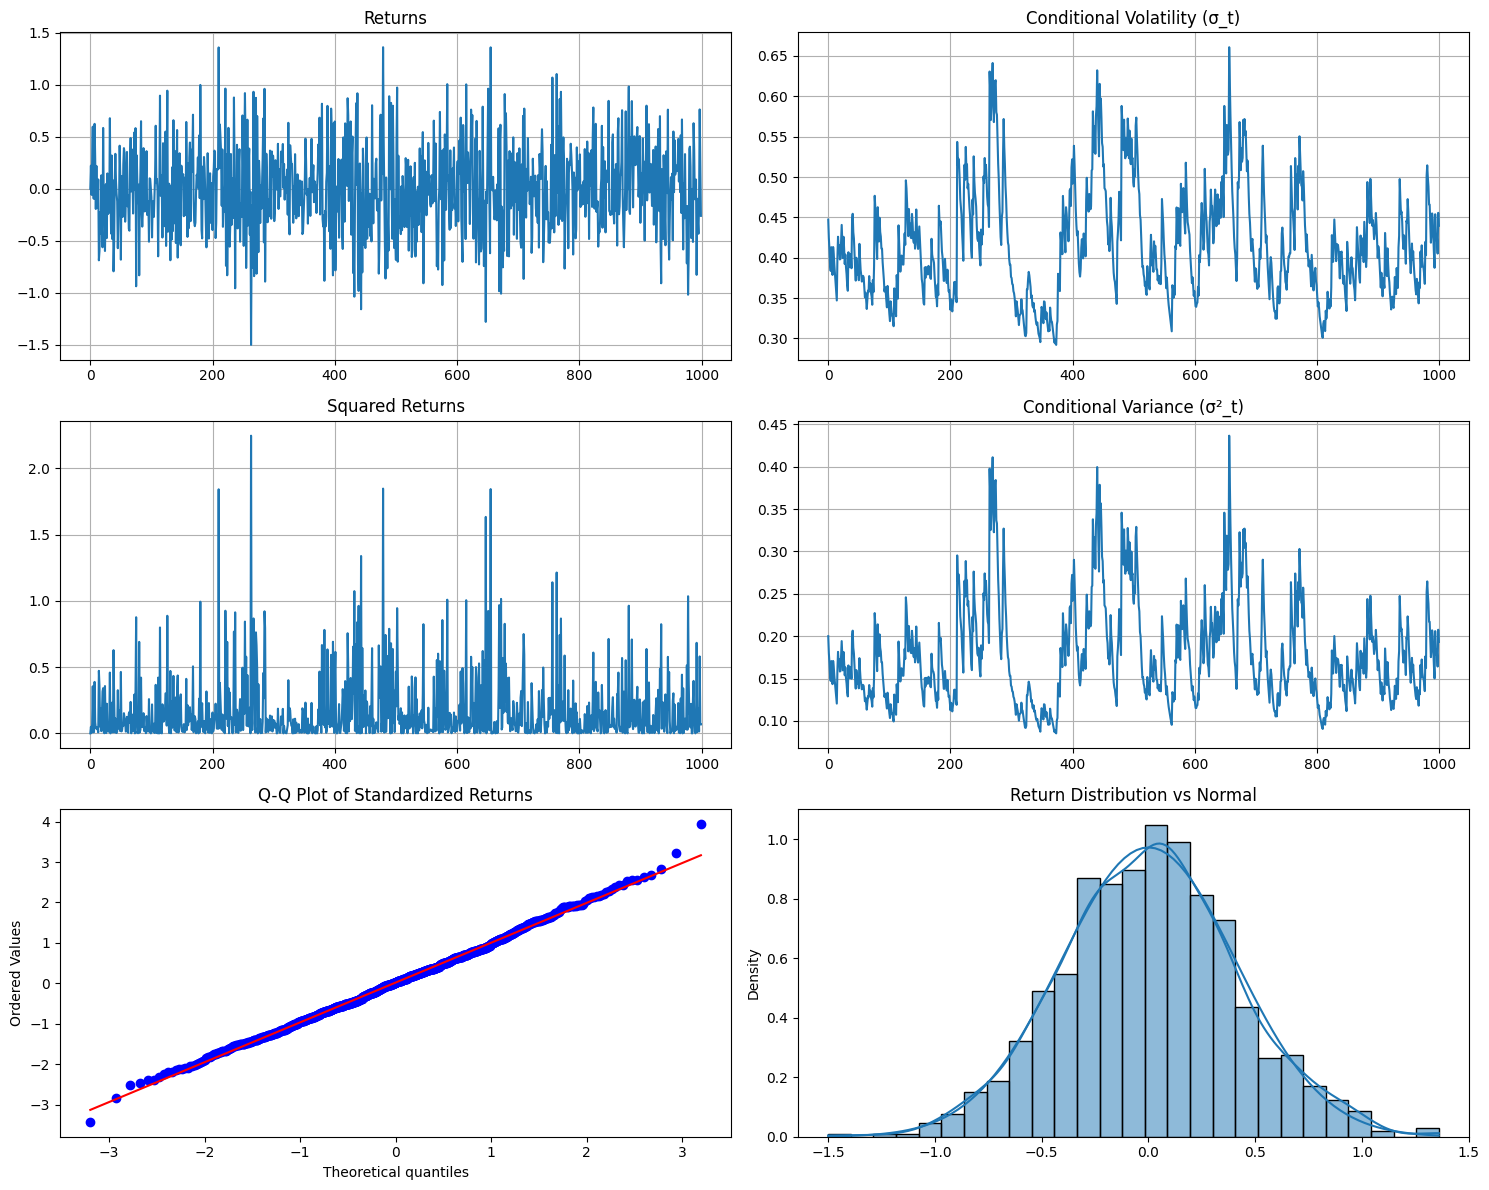


Comparing different volatility regimes...


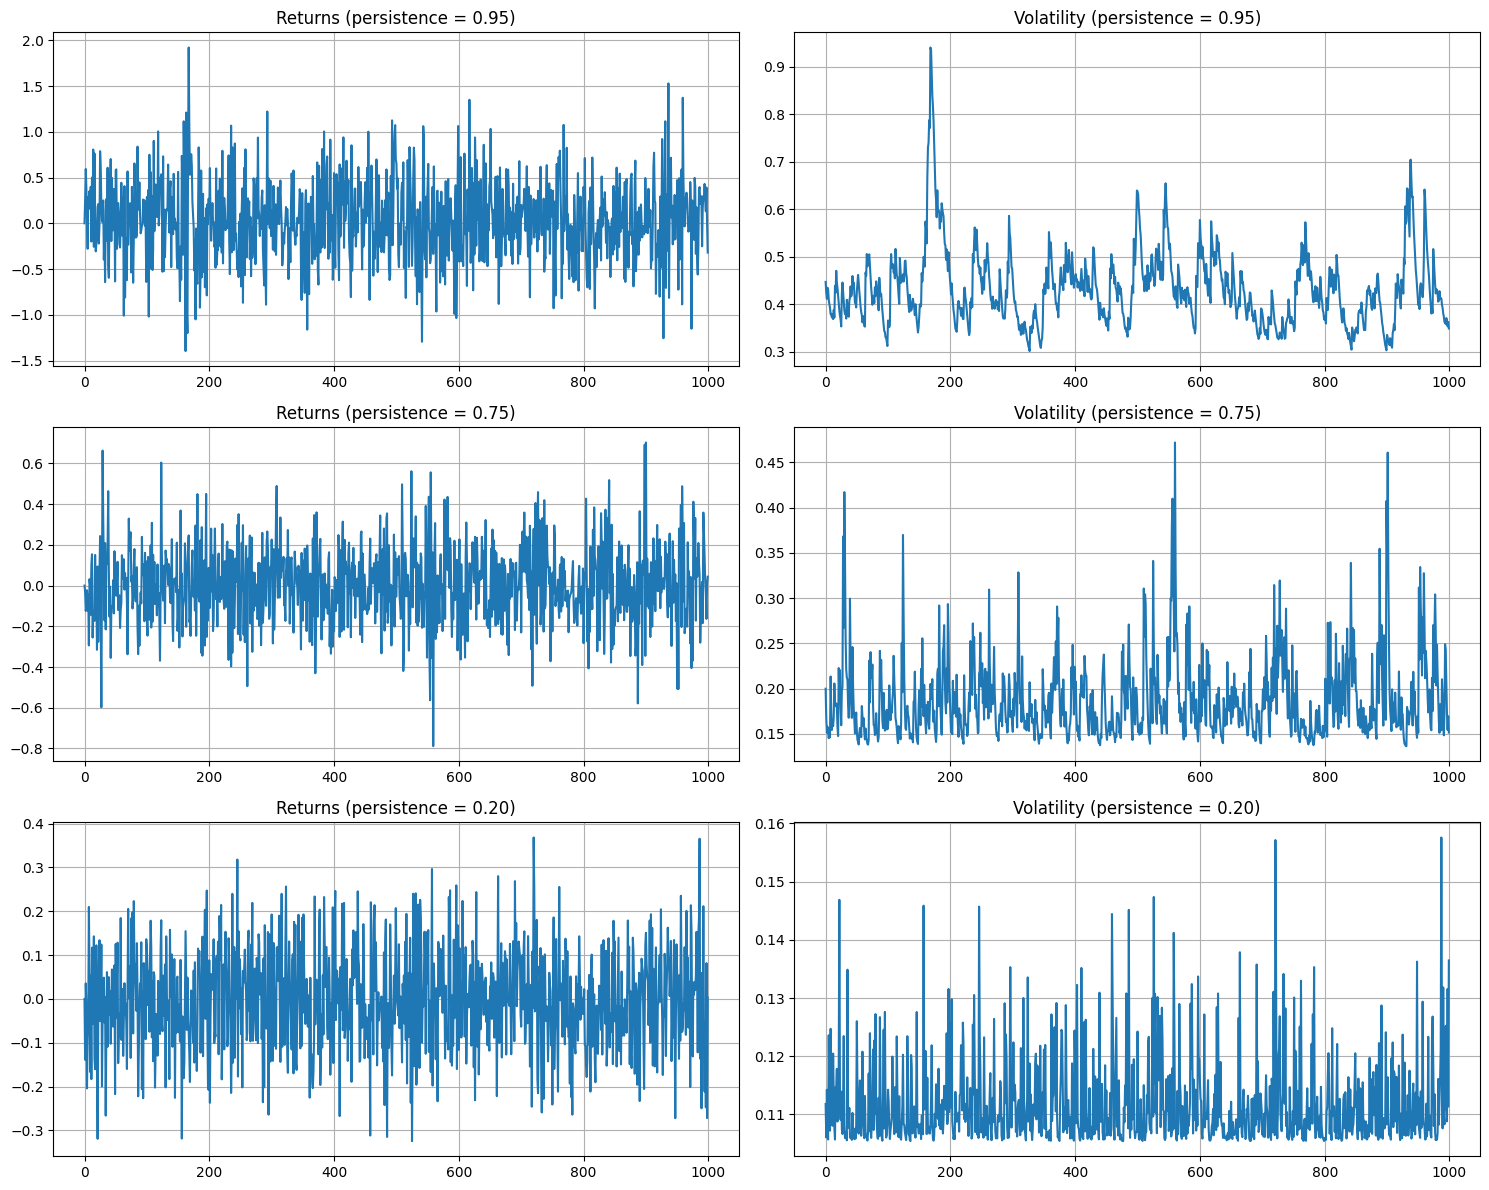


Analyzing volatility clustering...


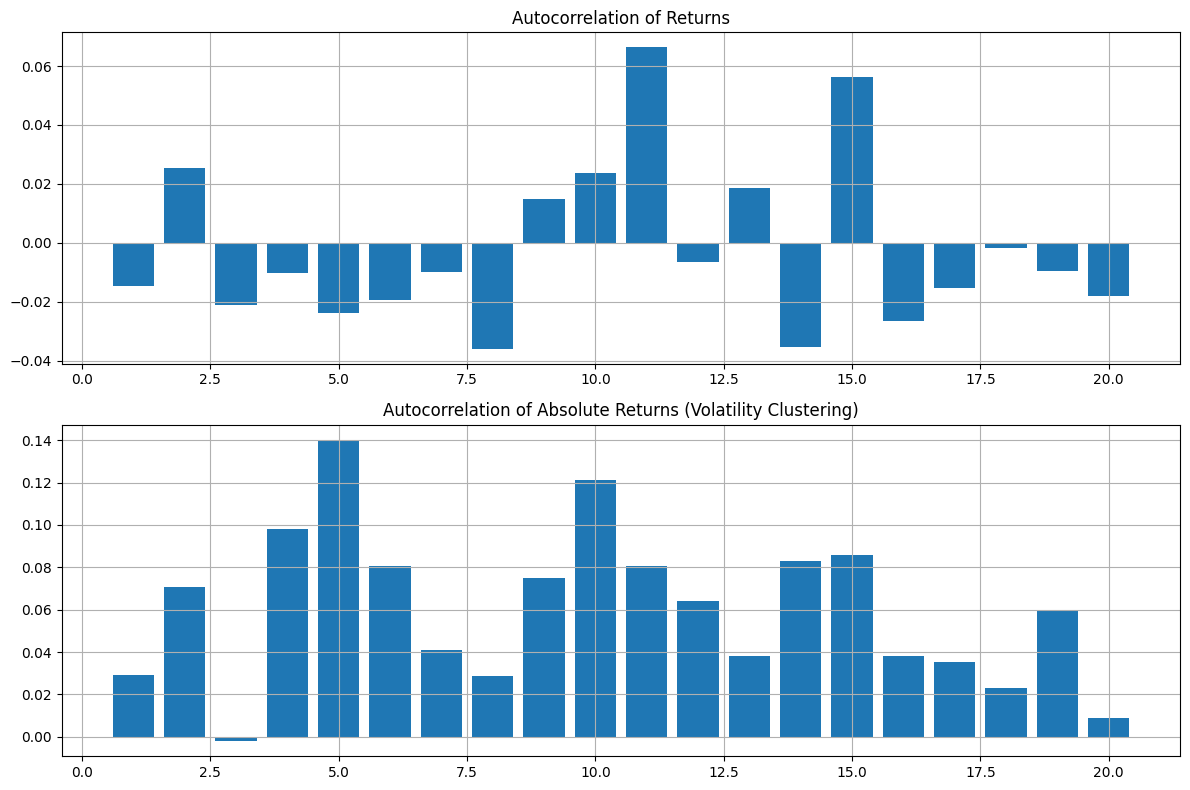


Demonstrating GARCH model fitting...

GARCH Model Fitting Results:
True parameters:
ω (omega): 0.01
α (alpha): 0.1
β (beta): 0.85

Estimated parameters:
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0177  1.315e-02     -1.345      0.179 [-4.346e-02,8.089e-03]


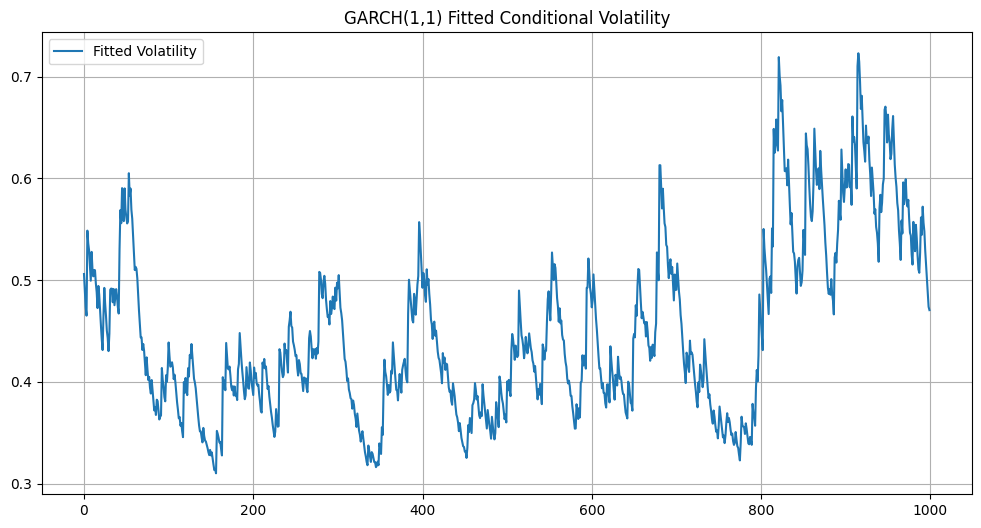

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from arch import arch_model

# Set random seed for reproducibility
np.random.seed(42)

def generate_garch11(omega, alpha, beta, n_points=1000):
    """
    Generate a GARCH(1,1) process:
    r_t = σ_t * ε_t
    σ²_t = ω + α * r²_{t-1} + β * σ²_{t-1}
    
    Parameters:
    -----------
    omega : float
        The constant term in variance equation
    alpha : float
        The coefficient for previous squared return
    beta : float
        The coefficient for previous variance
    n_points : int
        Number of points to generate
    
    Returns:
    --------
    tuple
        (returns, conditional_variances)
    """
    # Initialize arrays
    returns = np.zeros(n_points)
    variances = np.zeros(n_points)
    
    # Set initial variance
    variances[0] = omega / (1 - alpha - beta)  # Unconditional variance
    
    # Generate process
    for t in range(1, n_points):
        # Generate random shock
        z = np.random.standard_normal()
        
        # Calculate return
        returns[t] = np.sqrt(variances[t-1]) * z
        
        # Update variance
        variances[t] = omega + alpha * returns[t-1]**2 + beta * variances[t-1]
    
    return returns, variances

def plot_garch_characteristics(returns, variances):
    """
    Create a comprehensive plot showing key characteristics of GARCH process
    """
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    
    # Plot returns
    axes[0, 0].plot(returns)
    axes[0, 0].set_title('Returns')
    axes[0, 0].grid(True)
    
    # Plot conditional volatility
    axes[0, 1].plot(np.sqrt(variances))
    axes[0, 1].set_title('Conditional Volatility (σ_t)')
    axes[0, 1].grid(True)
    
    # Plot squared returns
    axes[1, 0].plot(returns**2)
    axes[1, 0].set_title('Squared Returns')
    axes[1, 0].grid(True)
    
    # Plot conditional variance
    axes[1, 1].plot(variances)
    axes[1, 1].set_title('Conditional Variance (σ²_t)')
    axes[1, 1].grid(True)
    
    # QQ plot of standardized returns
    standardized_returns = returns / np.sqrt(variances)
    stats.probplot(standardized_returns, dist="norm", plot=axes[2, 0])
    axes[2, 0].set_title('Q-Q Plot of Standardized Returns')
    
    # Plot return distribution
    sns.histplot(returns, stat='density', kde=True, ax=axes[2, 1])
    x = np.linspace(min(returns), max(returns), 100)
    axes[2, 1].plot(x, stats.norm.pdf(x, 0, np.std(returns)))
    axes[2, 1].set_title('Return Distribution vs Normal')
    
    plt.tight_layout()
    plt.show()

def compare_volatility_regimes():
    """
    Compare GARCH processes with different persistence levels
    """
    # Generate processes with different persistence (alpha + beta)
    params = [
        (0.01, 0.1, 0.85),  # High persistence
        (0.01, 0.3, 0.45),  # Medium persistence
        (0.01, 0.1, 0.1),   # Low persistence
    ]
    
    fig, axes = plt.subplots(len(params), 2, figsize=(15, 4*len(params)))
    
    for i, (omega, alpha, beta) in enumerate(params):
        returns, variances = generate_garch11(omega, alpha, beta)
        persistence = alpha + beta
        
        # Plot returns
        axes[i, 0].plot(returns)
        axes[i, 0].set_title(f'Returns (persistence = {persistence:.2f})')
        axes[i, 0].grid(True)
        
        # Plot volatility
        axes[i, 1].plot(np.sqrt(variances))
        axes[i, 1].set_title(f'Volatility (persistence = {persistence:.2f})')
        axes[i, 1].grid(True)
    
    plt.tight_layout()
    plt.show()

def analyze_volatility_clustering():
    """
    Demonstrate and analyze volatility clustering in GARCH process
    """
    # Generate GARCH process
    omega, alpha, beta = 0.01, 0.1, 0.85
    returns, variances = generate_garch11(omega, alpha, beta)
    
    # Plot autocorrelation of absolute returns
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    
    # Autocorrelation of returns
    lags = 20
    acf_returns = [np.corrcoef(returns[:-k], returns[k:])[0,1] for k in range(1, lags+1)]
    axes[0].bar(range(1, lags+1), acf_returns)
    axes[0].set_title('Autocorrelation of Returns')
    axes[0].grid(True)
    
    # Autocorrelation of absolute returns (volatility clustering)
    acf_abs_returns = [np.corrcoef(np.abs(returns[:-k]), np.abs(returns[k:]))[0,1] 
                      for k in range(1, lags+1)]
    axes[1].bar(range(1, lags+1), acf_abs_returns)
    axes[1].set_title('Autocorrelation of Absolute Returns (Volatility Clustering)')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

def fit_garch_model():
    """
    Demonstrate GARCH model fitting on simulated data
    """
    # Generate true GARCH process
    true_omega, true_alpha, true_beta = 0.01, 0.1, 0.85
    returns, _ = generate_garch11(true_omega, true_alpha, true_beta)
    
    # Fit GARCH model
    model = arch_model(returns, vol='Garch', p=1, q=1)
    results = model.fit(disp='off')
    
    # Print results
    print("\nGARCH Model Fitting Results:")
    print("True parameters:")
    print(f"ω (omega): {true_omega}")
    print(f"α (alpha): {true_alpha}")
    print(f"β (beta): {true_beta}")
    print("\nEstimated parameters:")
    print(results.summary().tables[1])
    
    # Plot true vs fitted volatility
    plt.figure(figsize=(12, 6))
    plt.plot(np.sqrt(results.conditional_volatility**2), 
             label='Fitted Volatility')
    plt.title('GARCH(1,1) Fitted Conditional Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run analyses
print("Generating and analyzing GARCH process...")
returns, variances = generate_garch11(0.01, 0.1, 0.85)
plot_garch_characteristics(returns, variances)

print("\nComparing different volatility regimes...")
compare_volatility_regimes()

print("\nAnalyzing volatility clustering...")
analyze_volatility_clustering()

print("\nDemonstrating GARCH model fitting...")
fit_garch_model()

In [2]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.5/927.5 kB 15.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Real project

[*********************100%***********************]  1 of 1 completed
/var/folders/fc/xqlqp1_91msbj5k907rjvrm80000gn/T/ipykernel_24576/675206155.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_vol = np.sqrt(self.results.conditional_volatility[-1])


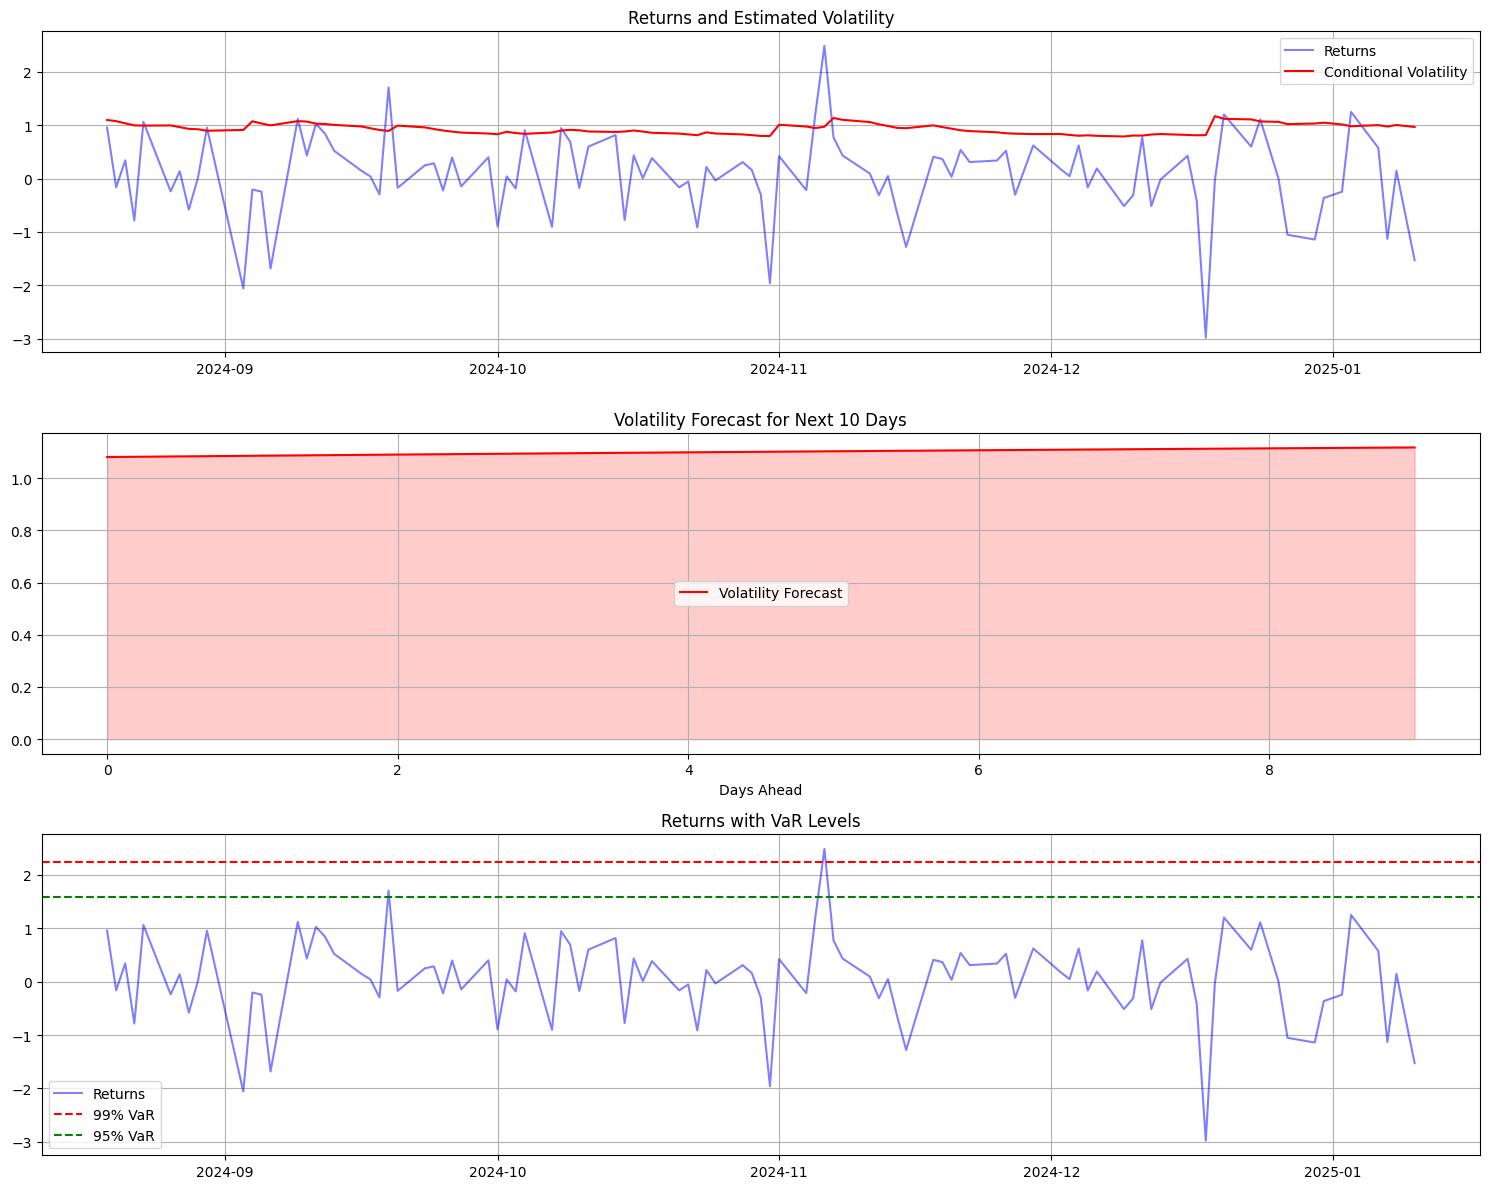


Risk Report for SPY
99% Daily VaR: -2.25%
95% Daily VaR: -1.59%

Volatility Forecast:
Day 1: 1.08%
Day 2: 1.09%
Day 3: 1.09%
Day 4: 1.09%
Day 5: 1.10%
Day 6: 1.10%
Day 7: 1.11%
Day 8: 1.11%
Day 9: 1.11%
Day 10: 1.12%


In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
from arch import arch_model
from scipy import stats
import matplotlib.pyplot as plt

class GARCHRiskManager:
    """
    A comprehensive risk management system using GARCH models.
    This class handles everything from data processing to risk metrics calculation.
    """
    def __init__(self, ticker='SPY', start_date='2020-01-01'):
        # Initialize with a ticker symbol and start date
        self.ticker = ticker
        self.start_date = start_date
        self.data = self._get_data()
        self.model = None
        self.results = None
        
    def _get_data(self):
        """
        Fetch and prepare market data for analysis
        """
        # Download data and calculate returns
        stock = yf.download(self.ticker, start=self.start_date)
        returns = 100 * stock['Close'].pct_change().dropna()
        return returns
    
    def fit_garch(self):
        """
        Fit GARCH(1,1) model to the return data
        """
        # Specify and fit the GARCH model
        self.model = arch_model(self.data, vol='Garch', p=1, q=1)
        self.results = self.model.fit(disp='off')
        return self.results
    
    def calculate_var(self, confidence_level=0.99):
        """
        Calculate Value at Risk using current volatility estimate
        """
        if self.results is None:
            self.fit_garch()
            
        # Get current volatility
        current_vol = np.sqrt(self.results.conditional_volatility[-1])
        
        # Calculate VaR
        var = stats.norm.ppf(1-confidence_level) * current_vol
        return var
    
    def forecast_volatility(self, horizon=10):
        """
        Forecast volatility for specified number of days ahead
        """
        if self.results is None:
            self.fit_garch()
            
        # Generate volatility forecast
        forecast = self.results.forecast(horizon=horizon)
        forecast_vol = np.sqrt(forecast.variance.values[-1, :])
        return forecast_vol
    
    def plot_analysis(self):
        """
        Create comprehensive visualization of the analysis
        """
        if self.results is None:
            self.fit_garch()
            
        # Create figure with multiple subplots
        fig, axes = plt.subplots(3, 1, figsize=(15, 12))
        
        # Plot 1: Returns and Volatility
        axes[0].plot(self.data.index[-100:], self.data[-100:], 
                    'b', alpha=0.5, label='Returns')
        axes[0].plot(self.data.index[-100:], 
                    np.sqrt(self.results.conditional_volatility[-100:]), 
                    'r', label='Conditional Volatility')
        axes[0].set_title('Returns and Estimated Volatility')
        axes[0].legend()
        axes[0].grid(True)
        
        # Plot 2: Volatility Forecast
        forecast_vol = self.forecast_volatility(horizon=10)
        axes[1].plot(range(10), forecast_vol, 'r-', label='Volatility Forecast')
        axes[1].fill_between(range(10), forecast_vol, alpha=0.2, color='red')
        axes[1].set_title('Volatility Forecast for Next 10 Days')
        axes[1].set_xlabel('Days Ahead')
        axes[1].legend()
        axes[1].grid(True)
        
        # Plot 3: VaR Analysis
        var_99 = self.calculate_var(0.99)
        var_95 = self.calculate_var(0.95)
        axes[2].plot(self.data.index[-100:], self.data[-100:], 
                    'b', alpha=0.5, label='Returns')
        axes[2].axhline(y=-var_99, color='r', linestyle='--', 
                       label='99% VaR')
        axes[2].axhline(y=-var_95, color='g', linestyle='--', 
                       label='95% VaR')
        axes[2].set_title('Returns with VaR Levels')
        axes[2].legend()
        axes[2].grid(True)
        
        plt.tight_layout()
        plt.show()
        
    def generate_risk_report(self):
        """
        Generate a comprehensive risk report
        """
        var_99 = self.calculate_var(0.99)
        var_95 = self.calculate_var(0.95)
        forecast_vol = self.forecast_volatility(horizon=10)
        
        print(f"\nRisk Report for {self.ticker}")
        print("=" * 50)
        print(f"99% Daily VaR: {var_99:.2f}%")
        print(f"95% Daily VaR: {var_95:.2f}%")
        print("\nVolatility Forecast:")
        for day, vol in enumerate(forecast_vol, 1):
            print(f"Day {day}: {vol:.2f}%")

# Example usage
if __name__ == "__main__":
    # Create risk manager for S&P 500 ETF
    risk_manager = GARCHRiskManager('SPY', '2020-01-01')
    
    # Fit model and generate analysis
    risk_manager.fit_garch()
    
    # Show visualizations
    risk_manager.plot_analysis()
    
    # Generate risk report
    risk_manager.generate_risk_report()